In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('TokyoSinValoresNulos.csv')

In [56]:
#Verificamos la informacion del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18736 entries, 0 to 18735
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    18736 non-null  int64  
 1   id                                            18736 non-null  int64  
 2   listing_url                                   18736 non-null  object 
 3   scrape_id                                     18736 non-null  int64  
 4   last_scraped                                  18736 non-null  object 
 5   source                                        18736 non-null  object 
 6   name                                          18736 non-null  object 
 7   description                                   18736 non-null  object 
 8   neighborhood_overview                         18736 non-null  object 
 9   picture_url                                   18736 non-null 

In [57]:
#Corroboramos valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

Unnamed: 0                                      0
id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 76, dtype: int64

In [58]:
#creo dos dataframe para procesasar los outliers
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)
cuantitativas = data.iloc[:, list(range(41,49)) + list(range(52,55)) + list(range(57,59)) + list(range(62,68)) + list(range(71,75)) + [1,3,10,23,24,31,32,35,36,38,39]]
cualitativas = data.iloc[:, list(range(4, 9)) +  list(range(11,22)) + list(range(25, 30)) +    [2,33,34,37,40,50,51,56,60,61,69,70]]

In [59]:
cuantitativas

,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,...,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds
0,13000.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,15,27,...,20240927024131,964081,1,2,35.717070,139.826080,2,1.0,1.0,2.0
1,8706.0,3,14,3.0,3.0,14.0,14.0,3.0,4,9,...,20240927024131,801494,1,6,35.738440,139.769170,1,1.0,1.0,1.0
2,24043.0,3,1125,1.0,10.0,365.0,1125.0,4.2,1,8,...,20240927024131,4847803,8,18,35.678780,139.678470,6,1.0,2.0,4.0
3,23857.0,2,7,2.0,2.0,7.0,7.0,2.0,12,16,...,20240927024131,5596383,1,6,35.658000,139.671340,2,1.0,1.0,2.0
4,6000.0,2,60,2.0,2.0,1125.0,1125.0,2.0,8,26,...,20240927024131,5686404,1,2,35.743630,139.798520,3,1.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,16000.0,2,365,2.0,5.0,365.0,365.0,2.1,7,14,...,20240927024131,367379600,4,4,35.702643,139.653547,6,1.0,2.0,3.0
18732,14400.0,1,365,1.0,1.0,365.0,365.0,1.0,30,60,...,20240927024131,510001252,12,12,35.742981,139.631591,4,1.0,2.0,4.0
18733,15000.0,1,365,1.0,1.0,365.0,365.0,1.0,16,40,...,20240927024131,589712713,13,13,35.711557,139.701221,3,1.0,1.0,1.0
18734,16086.0,1,365,1.0,1.0,365.0,365.0,1.0,22,46,...,20240927024131,589712713,13,13,35.710939,139.699703,3,1.0,1.0,2.0


In [60]:
cualitativas

,last_scraped,source,name,description,neighborhood_overview,host_url,host_name,host_since,host_location,host_about,...,room_type,bathrooms_text,amenities,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,2024-09-27,city scrape,Oshiage Holiday Apartment,Description,Neighborhood Overview,https://www.airbnb.com/users/show/964081,Yoshimi & Marek,2011-08-13,"Tokyo, Japan",Would love to travel all over the world and me...,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Self ...",Calendar Updated,t,2024-09-27,2011-09-21,2024-09-06,M130003350,f
1,2024-09-27,city scrape,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://www.airbnb.com/users/show/801494,Kei,2011-07-10,Japan,Love culture/foods/anime and to know about oth...,...,Private room,1 shared bath,"[""TV with standard cable"", ""Essentials"", ""Bed ...",Calendar Updated,t,2024-09-27,2012-11-28,2024-09-22,M130000243,f
2,2024-09-27,city scrape,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://www.airbnb.com/users/show/4847803,Best Stay In Tokyo!,2013-01-25,"Tokyo, Japan",A host backed up by a team of professional cle...,...,Entire home/apt,1 bath,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",Calendar Updated,t,2024-09-27,2013-04-07,2024-09-10,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,t
3,2024-09-27,city scrape,5 mins Shibuya Cat modern sunny Shimokita,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,https://www.airbnb.com/users/show/5596383,Wakana,2013-03-24,"Tokyo, Japan","Hi there, I am Wakana! I am an openminded, fri...",...,Private room,1 shared bath,"[""Essentials"", ""Bed linens"", ""Baking sheet"", ""...",Calendar Updated,t,2024-09-27,2013-04-06,2024-06-26,M130001107,f
4,2024-09-27,city scrape,Stay with host Cozy private room Senju area,Ｓtay with host.We can help your travel.<br />B...,There are shopping mall near Senjuohashi stati...,https://www.airbnb.com/users/show/5686404,Yukiko,2013-03-30,"Tokyo, Japan",出身地 東京\r\n好きなこと 旅行、テニス\r\n\r\nA host is the hu...,...,Private room,1.5 baths,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",Calendar Updated,t,2024-09-27,2013-08-10,2024-09-23,M130007760,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,2024-09-27,city scrape,高元寺站徒步4分钟,Relax in this unique and serene retreat.,Neighborhood Overview,https://www.airbnb.com/users/show/367379600,優維,2020-09-13,"Suginami City, Japan",ｺｰﾋｰが好きです。特に旅先で地元の人が集うｶﾌｪで飲むｺｰﾋｰが大好きです,...,Entire home/apt,1 bath,"[""Smoke alarm"", ""Air conditioning"", ""Carbon mo...",Calendar Updated,t,2024-09-27,2040-01-01,2040-01-01,M130028792,t
18732,2024-09-27,city scrape,和绮新快乐居（独享三间房）,This one-of-a-kind home is unique in its own w...,Neighborhood Overview,https://www.airbnb.com/users/show/510001252,Rao,2023-04-14,"Tokyo, Japan",Hello let's enjoying trip and local life!,...,Private room,1 private bath,"[""First aid kit"", ""Smoke alarm"", ""Air conditio...",Calendar Updated,t,2024-09-27,2040-01-01,2040-01-01,M130020724,t
18733,2024-09-27,city scrape,G0305 位于新宿区中心位置，适合家庭和情侣；距離山手线高田马场站6分钟，交通便利，无电梯,Please relax with your family.<br />Narita Air...,Neighborhood Overview,https://www.airbnb.com/users/show/589712713,Yoshiki,2024-07-14,"Tokyo, Japan",新手上线，多多关照！,...,Entire home/apt,1 bath,"[""Essentials"", ""Bed linens"", ""Rice maker"", ""Mi...",Calendar Updated,t,2024-09-27,2040-01-01,2040-01-01,M130044022,t
18734,2024-09-27,city scrape,G0202 位于新宿区中心位置，适合家庭和情侣；距離山手线高田马场站6分钟，交通便利，无电梯,Please relax with your family.<br />Narita Air...,Neighborhood Overview,https://www.airbnb.com/users/show/589712713,Yoshiki,2024-07-14,"Tokyo, Japan",新手上线，多多关照！,...,Entire home/apt,1 bath,"[""Essentials"", ""Bed linens"", ""Rice maker"", ""Mi...",Calendar U

<Figure size 1500x800 with 0 Axes>

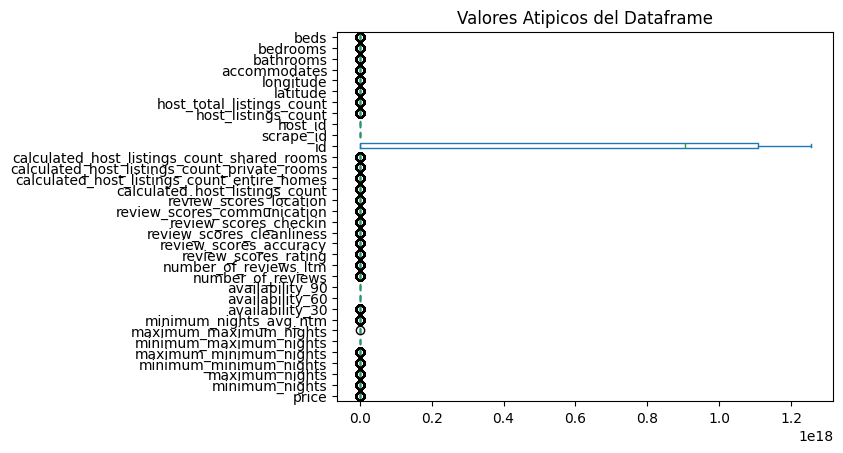

In [61]:
#Realizamos diagramas de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas.plot(kind="box", vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #Dibujamos el diagrama

In [62]:
y=cuantitativas
Limite_Superior= y.mean() + 3 *y.std()
Limite_Inferior = y.mean() - 3 *y.std()
print("Limite Superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite Superior permitido price                                           1.558044e+05
minimum_nights                                  3.233483e+01
maximum_nights                                  1.434049e+03
minimum_minimum_nights                          3.125910e+01
maximum_minimum_nights                          4.873529e+01
minimum_maximum_nights                          1.763778e+03
maximum_maximum_nights                          1.889144e+03
minimum_nights_avg_ntm                          3.387757e+01
availability_30                                 3.133559e+01
availability_60                                 7.139396e+01
availability_90                                 1.161369e+02
number_of_reviews                               2.296676e+02
number_of_reviews_ltm                           7.637999e+01
review_scores_rating                            5.747914e+00
review_scores_accuracy                          5.691130e+00
review_scores_cleanliness                       5.806459e+0

In [63]:
#Obtenemos datos y los outlers se convierten 
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,...,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds
0,13000.0,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,15,27,...,20240927024131,964081,1.0,2.0,35.717070,139.826080,2.0,1.0,1.0,2.0
1,8706.0,3.0,14.0,3.0,3.0,14.0,14.0,3.0,4,9,...,20240927024131,801494,1.0,6.0,35.738440,139.769170,1.0,1.0,1.0,1.0
2,24043.0,3.0,1125.0,1.0,10.0,365.0,1125.0,4.2,1,8,...,20240927024131,4847803,8.0,18.0,35.678780,139.678470,6.0,1.0,2.0,4.0
3,23857.0,2.0,7.0,2.0,2.0,7.0,7.0,2.0,12,16,...,20240927024131,5596383,1.0,6.0,35.658000,139.671340,2.0,1.0,1.0,2.0
4,6000.0,2.0,60.0,2.0,2.0,1125.0,1125.0,2.0,8,26,...,20240927024131,5686404,1.0,2.0,35.743630,139.798520,3.0,1.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,16000.0,2.0,365.0,2.0,5.0,365.0,365.0,2.1,7,14,...,20240927024131,367379600,4.0,4.0,35.702643,139.653547,6.0,1.0,2.0,3.0
18732,14400.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,30,60,...,20240927024131,510001252,12.0,12.0,35.742981,139.631591,4.0,1.0,2.0,4.0
18733,15000.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,16,40,...,20240927024131,589712713,13.0,13.0,35.711557,139.701221,3.0,1.0,1.0,1.0
18734,16086.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,22,46,...,20240927024131,589712713,13.0,13.0,35.710939,139.699703,3.0,1.0,1.0,2.0


In [64]:
#corroboramos valores nulos del datagrame3
valores_nulos=data3.isnull().sum()
valores_nulos

price                                            37
minimum_nights                                   24
maximum_nights                                    1
minimum_minimum_nights                           24
maximum_minimum_nights                           60
minimum_maximum_nights                            0
maximum_maximum_nights                            1
minimum_nights_avg_ntm                           30
availability_30                                   0
availability_60                                   0
availability_90                                   0
number_of_reviews                               328
number_of_reviews_ltm                           126
review_scores_rating                            294
review_scores_accuracy                          267
review_scores_cleanliness                       313
review_scores_checkin                           269
review_scores_communication                     390
review_scores_location                          223
calculated_h

In [65]:
#Reemplazamos valores atipicos (nulos) del datagrame con mean
#Realizamos copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1 ))
data_clean

,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,...,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds
0,13000.0,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,15,27,...,20240927024131,964081,1.0,2.0,35.717070,139.826080,2.0,1.0,1.0,2.0
1,8706.0,3.0,14.0,3.0,3.0,14.0,14.0,3.0,4,9,...,20240927024131,801494,1.0,6.0,35.738440,139.769170,1.0,1.0,1.0,1.0
2,24043.0,3.0,1125.0,1.0,10.0,365.0,1125.0,4.2,1,8,...,20240927024131,4847803,8.0,18.0,35.678780,139.678470,6.0,1.0,2.0,4.0
3,23857.0,2.0,7.0,2.0,2.0,7.0,7.0,2.0,12,16,...,20240927024131,5596383,1.0,6.0,35.658000,139.671340,2.0,1.0,1.0,2.0
4,6000.0,2.0,60.0,2.0,2.0,1125.0,1125.0,2.0,8,26,...,20240927024131,5686404,1.0,2.0,35.743630,139.798520,3.0,1.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,16000.0,2.0,365.0,2.0,5.0,365.0,365.0,2.1,7,14,...,20240927024131,367379600,4.0,4.0,35.702643,139.653547,6.0,1.0,2.0,3.0
18732,14400.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,30,60,...,20240927024131,510001252,12.0,12.0,35.742981,139.631591,4.0,1.0,2.0,4.0
18733,15000.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,16,40,...,20240927024131,589712713,13.0,13.0,35.711557,139.701221,3.0,1.0,1.0,1.0
18734,16086.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,22,46,...,20240927024131,589712713,13.0,13.0,35.710939,139.699703,3.0,1.0,1.0,2.0


In [66]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0
number_of_reviews                               0
number_of_reviews_ltm                           0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_location                          0
calculated_host_listings_count                  0


**PROCEDIMIENTO "CUANTILES" PARA SUSTIRTUIR OUTLIERS EN DATAFRAME**

In [67]:
y=cuantitativas

percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_izq=percentile75 + 1.5*iqr
Limite_Inferior_izq=percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_izq)
print("Limite inferior permitido", Limite_Inferior_izq)

Limite superior permitido price                                           4.303925e+04
minimum_nights                                  3.500000e+00
maximum_nights                                  6.425000e+02
minimum_minimum_nights                          3.500000e+00
maximum_minimum_nights                          6.000000e+00
minimum_maximum_nights                          2.265000e+03
maximum_maximum_nights                          2.265000e+03
minimum_nights_avg_ntm                          6.000000e+00
availability_30                                 2.450000e+01
availability_60                                 6.950000e+01
availability_90                                 1.190000e+02
number_of_reviews                               1.055000e+02
number_of_reviews_ltm                           4.950000e+01
review_scores_rating                            5.570000e+00
review_scores_accuracy                          5.495000e+00
review_scores_cleanliness                       5.600000e+0

In [68]:
#Obtenemos datos limppios
data3_izq=cuantitativas[(y<=Limite_Superior_izq)& (y>=Limite_Inferior_izq)]
data3_izq

,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,...,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds
0,13000.0,3.0,NaN,3.0,3.0,1125.0,1125.0,3.0,15.0,27,...,20240927024131,964081,1.0,2.0,35.717070,139.826080,2.0,1.0,1.0,2.0
1,8706.0,3.0,14.0,3.0,3.0,14.0,14.0,3.0,4.0,9,...,20240927024131,801494,1.0,6.0,35.738440,139.769170,1.0,1.0,1.0,1.0
2,24043.0,3.0,NaN,1.0,NaN,365.0,1125.0,4.2,1.0,8,...,20240927024131,4847803,8.0,18.0,35.678780,139.678470,6.0,1.0,2.0,4.0
3,23857.0,2.0,7.0,2.0,2.0,7.0,7.0,2.0,12.0,16,...,20240927024131,5596383,1.0,6.0,35.658000,139.671340,2.0,1.0,1.0,2.0
4,6000.0,2.0,60.0,2.0,2.0,1125.0,1125.0,2.0,8.0,26,...,20240927024131,5686404,1.0,2.0,35.743630,139.798520,3.0,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,16000.0,2.0,365.0,2.0,5.0,365.0,365.0,2.1,7.0,14,...,20240927024131,367379600,4.0,4.0,35.702643,139.653547,6.0,1.0,2.0,3.0
18732,14400.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,NaN,60,...,20240927024131,510001252,12.0,12.0,35.742981,139.631591,4.0,1.0,2.0,4.0
18733,15000.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,16.0,40,...,20240927024131,589712713,13.0,13.0,35.711557,139.701221,3.0,1.0,1.0,1.0
18734,16086.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,22.0,46,...,20240927024131,589712713,13.0,13.0,35.710939,139.699703,3.0,1.0,1.0,2.0


In [69]:
valores_nulos=data3_izq.isnull().sum()
valores_nulos

price                                           1184
minimum_nights                                  2249
maximum_nights                                  2666
minimum_minimum_nights                          1868
maximum_minimum_nights                          3011
minimum_maximum_nights                             0
maximum_maximum_nights                             1
minimum_nights_avg_ntm                          2426
availability_30                                 1106
availability_60                                    0
availability_90                                    0
number_of_reviews                               1639
number_of_reviews_ltm                            680
review_scores_rating                             790
review_scores_accuracy                           717
review_scores_cleanliness                        596
review_scores_checkin                            901
review_scores_communication                      952
review_scores_location                        

In [70]:
#Rwwmplzamos valores atipicos 
data4_izq=data3_izq.copy()
data4_izq=data4_izq.fillna(round(data3_izq.mean(),1))
data4_izq

,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,...,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds
0,13000.0,3.0,266.7,3.0,3.0,1125.0,1125.0,3.0,15.0,27,...,20240927024131,964081,1.0,2.0,35.717070,139.826080,2.0,1.0,1.0,2.0
1,8706.0,3.0,14.0,3.0,3.0,14.0,14.0,3.0,4.0,9,...,20240927024131,801494,1.0,6.0,35.738440,139.769170,1.0,1.0,1.0,1.0
2,24043.0,3.0,266.7,1.0,1.9,365.0,1125.0,4.2,1.0,8,...,20240927024131,4847803,8.0,18.0,35.678780,139.678470,6.0,1.0,2.0,4.0
3,23857.0,2.0,7.0,2.0,2.0,7.0,7.0,2.0,12.0,16,...,20240927024131,5596383,1.0,6.0,35.658000,139.671340,2.0,1.0,1.0,2.0
4,6000.0,2.0,60.0,2.0,2.0,1125.0,1125.0,2.0,8.0,26,...,20240927024131,5686404,1.0,2.0,35.743630,139.798520,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,16000.0,2.0,365.0,2.0,5.0,365.0,365.0,2.1,7.0,14,...,20240927024131,367379600,4.0,4.0,35.702643,139.653547,6.0,1.0,2.0,3.0
18732,14400.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,6.5,60,...,20240927024131,510001252,12.0,12.0,35.742981,139.631591,4.0,1.0,2.0,4.0
18733,15000.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,16.0,40,...,20240927024131,589712713,13.0,13.0,35.711557,139.701221,3.0,1.0,1.0,1.0
18734,16086.0,1.0,365.0,1.0,1.0,365.0,365.0,1.0,22.0,46,...,20240927024131,589712713,13.0,13.0,35.710939,139.699703,3.0,1.0,1.0,2.0


In [71]:
#Unimos el Dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios=pd.concat([cualitativas,data4_izq], axis=1)
Datos_limpios

,last_scraped,source,name,description,neighborhood_overview,host_url,host_name,host_since,host_location,host_about,...,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds
0,2024-09-27,city scrape,Oshiage Holiday Apartment,Description,Neighborhood Overview,https://www.airbnb.com/users/show/964081,Yoshimi & Marek,2011-08-13,"Tokyo, Japan",Would love to travel all over the world and me...,...,20240927024131,964081,1.0,2.0,35.717070,139.826080,2.0,1.0,1.0,2.0
1,2024-09-27,city scrape,Kero-kero house room 1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://www.airbnb.com/users/show/801494,Kei,2011-07-10,Japan,Love culture/foods/anime and to know about oth...,...,20240927024131,801494,1.0,6.0,35.738440,139.769170,1.0,1.0,1.0,1.0
2,2024-09-27,city scrape,4F Spacious Apartment in Shinjuku / Shibuya Tokyo,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://www.airbnb.com/users/show/4847803,Best Stay In Tokyo!,2013-01-25,"Tokyo, Japan",A host backed up by a team of professional cle...,...,20240927024131,4847803,8.0,18.0,35.678780,139.678470,6.0,1.0,2.0,4.0
3,2024-09-27,city scrape,5 mins Shibuya Cat modern sunny Shimokita,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,https://www.airbnb.com/users/show/5596383,Wakana,2013-03-24,"Tokyo, Japan","Hi there, I am Wakana! I am an openminded, fri...",...,20240927024131,5596383,1.0,6.0,35.658000,139.671340,2.0,1.0,1.0,2.0
4,2024-09-27,city scrape,Stay with host Cozy private room Senju area,Ｓtay with host.We can help your travel.<br />B...,There are shopping mall near Senjuohashi stati...,https://www.airbnb.com/users/show/5686404,Yukiko,2013-03-30,"Tokyo, Japan",出身地 東京\r\n好きなこと 旅行、テニス\r\n\r\nA host is the hu...,...,20240927024131,5686404,1.0,2.0,35.743630,139.798520,3.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,2024-09-27,city scrape,高元寺站徒步4分钟,Relax in this unique and serene retreat.,Neighborhood Overview,https://www.airbnb.com/users/show/367379600,優維,2020-09-13,"Suginami City, Japan",ｺｰﾋｰが好きです。特に旅先で地元の人が集うｶﾌｪで飲むｺｰﾋｰが大好きです,...,20240927024131,367379600,4.0,4.0,35.702643,139.653547,6.0,1.0,2.0,3.0
18732,2024-09-27,city scrape,和绮新快乐居（独享三间房）,This one-of-a-kind home is unique in its own w...,Neighborhood Overview,https://www.airbnb.com/users/show/510001252,Rao,2023-04-14,"Tokyo, Japan",Hello let's enjoying trip and local life!,...,20240927024131,510001252,12.0,12.0,35.742981,139.631591,4.0,1.0,2.0,4.0
18733,2024-09-27,city scrape,G0305 位于新宿区中心位置，适合家庭和情侣；距離山手线高田马场站6分钟，交通便利，无电梯,Please relax with your family.<br />Narita Air...,Neighborhood Overview,https://www.airbnb.com/users/show/589712713,Yoshiki,2024-07-14,"Tokyo, Japan",新手上线，多多关照！,...,20240927024131,589712713,13.0,13.0,35.711557,139.701221,3.0,1.0,1.0,1.0
18734,2024-09-27,city scrape,G0202 位于新宿区中心位置，适合家庭和情侣；距離山手线高田马场站6分钟，交通便利，无电梯,Please relax with your family.<br />Narita Air...,Neighborhood Overview,https://www.airbnb.com/users/show/589712713,Yoshiki,2024-07-14,"Tokyo, Japan",新手上线，多多关照！,...,20240927024131,589712713,13.0,13.0,35.710939,139.699703,3.0,1.0,1.0,2.0


In [72]:
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

last_scraped             0
source                   0
name                     0
description              0
neighborhood_overview    0
                        ..
longitude                0
accommodates             0
bathrooms                0
bedrooms                 0
beds                     0
Length: 67, dtype: int64

In [53]:
#Convertir dataframe a  CSV
Datos_limpios.to_csv("TokyoAtipico.csv")